#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset into a DataFrame

In [2]:
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Checking the DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing the blanks in "TotalCharges" with "0" (string 0)
#### And then, converting them in float data-type values

In [4]:
# replacing " " with "0"
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
# converting the string data-type values to float data-type values
df["TotalCharges"] = df["TotalCharges"].astype("float")

#### Again checking the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Checking for overall null values in each column

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Descriptive analysis of the DataFrame
- This provides summary statistics for numeric columns in a DataFrame
- `df.describe()` returns `count`, `mean`, `std`, `min`, `25%` (1st quartile), `50%` (2nd quartile or median), `75%` (3rd quartile), `max`

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Checking for overall duplicate values

In [8]:
df.duplicated().sum()

0

#### Checking for duplicated values in column 'Customer ID'
- Reason why we've used `customerID` to check duplicate values is that it will be unique for every customer entry if it gets repeated then then the whole row has duplicate values.

In [9]:
df["customerID"].duplicated().sum()

0

`SeniorCitizen` column has integer values, so we'll make them string values "Yes" or "No"
#### Creating a function to convert 0/1 integer values to "Yes" or "No" binary values
- If 0 then No
- If 1 then Yes

Using any function could be done by using `apply()` method

In [10]:
def convert(value):
    if (value == 1):
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)

#### Printing DataFrame to check it

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Analysis of count of customers who have churned out
Using Seaborn and barplot

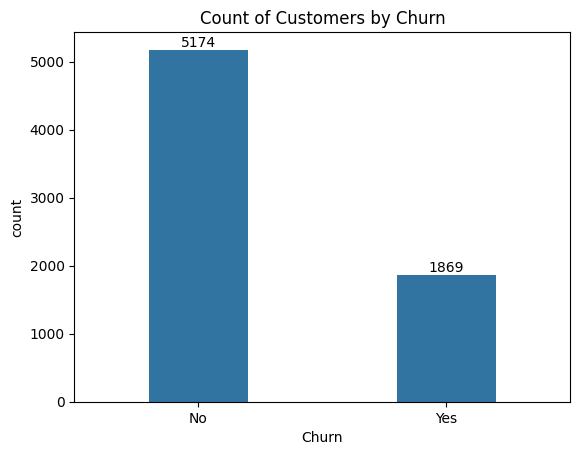

In [12]:
ax = sns.countplot(x = df["Churn"], data = df, width = 0.4)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

#### Analysis of percentage of customers who have churned out
Using Seaborn and piechart

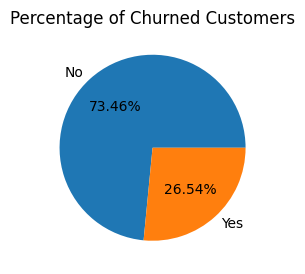

In [13]:
plt.figure(figsize = (3, 4))
gb = df.groupby("Churn").agg({"Churn": "count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 12)
plt.show()

From the given pie chart we can conclude that 26.54% of our customers have churned out.<br>
Now, let's explore the reason behind it

#### Analysis of customer churn out by gender

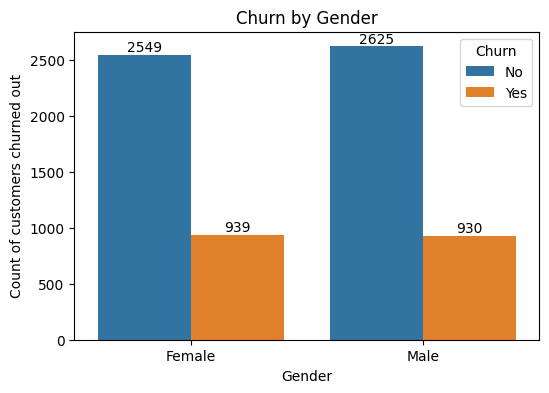

In [14]:
plt.figure(figsize = (6, 4))
bx = sns.countplot(x = "gender", data = df, hue = "Churn")
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.xlabel("Gender")
plt.ylabel("Count of customers churned out")
plt.title("Churn by Gender")
plt.show()

#### Analysis of customer churn out by age (SeniorCitizen/Non-SeniorCitizen)

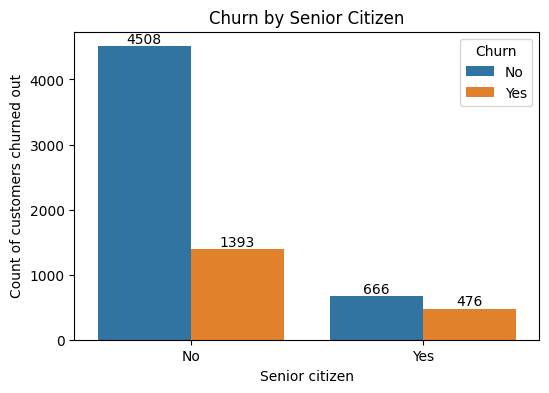

In [15]:
plt.figure(figsize = (6, 4))
bx = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.xlabel("Senior citizen")
plt.ylabel("Count of customers churned out")
plt.title("Churn by Senior Citizen")
plt.show()

#### Analysis of customer churn out by tenure

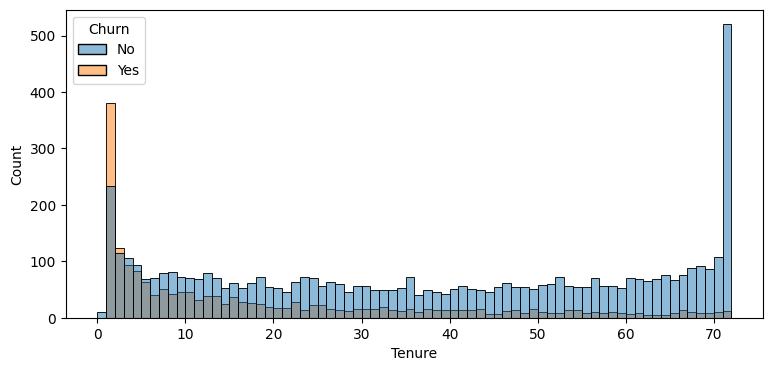

In [16]:
plt.figure(figsize = (9, 4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

People who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned out the most

#### Analysis of customer churn out by contract

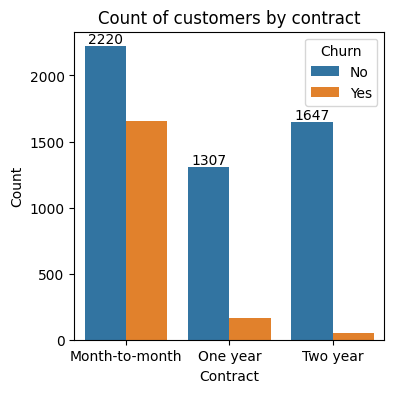

In [17]:
plt.figure(figsize = (4, 4))
cx = sns.countplot(x = "Contract", data = df, hue = "Churn")
cx.bar_label(cx.containers[0])
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Count of customers by contract")
plt.show()

People who have month-to-month contract are more likely to churn out then those who have 1 or 2 years of contract

In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#### Analysis of customer churn out by whether they've subscribed to movie streaming services

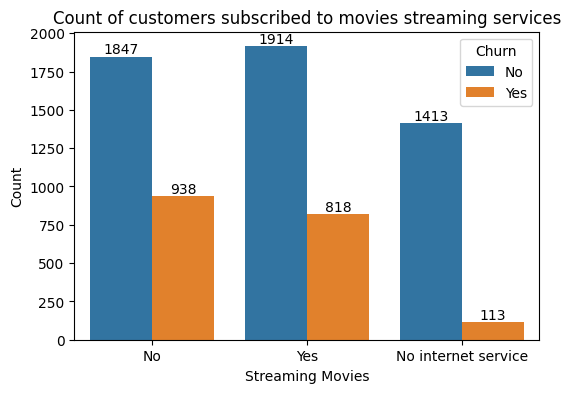

In [19]:
plt.figure(figsize = (6, 4))
stream_plot = sns.countplot(x = df["StreamingMovies"], data = df, hue = "Churn")
stream_plot.bar_label(stream_plot.containers[0])
stream_plot.bar_label(stream_plot.containers[1])
plt.title("Count of customers subscribed to movies streaming services")
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.show()

People who've subscribed to movie streaming services are less likely to churn out, and while people with no internet services at all are the least to churn out

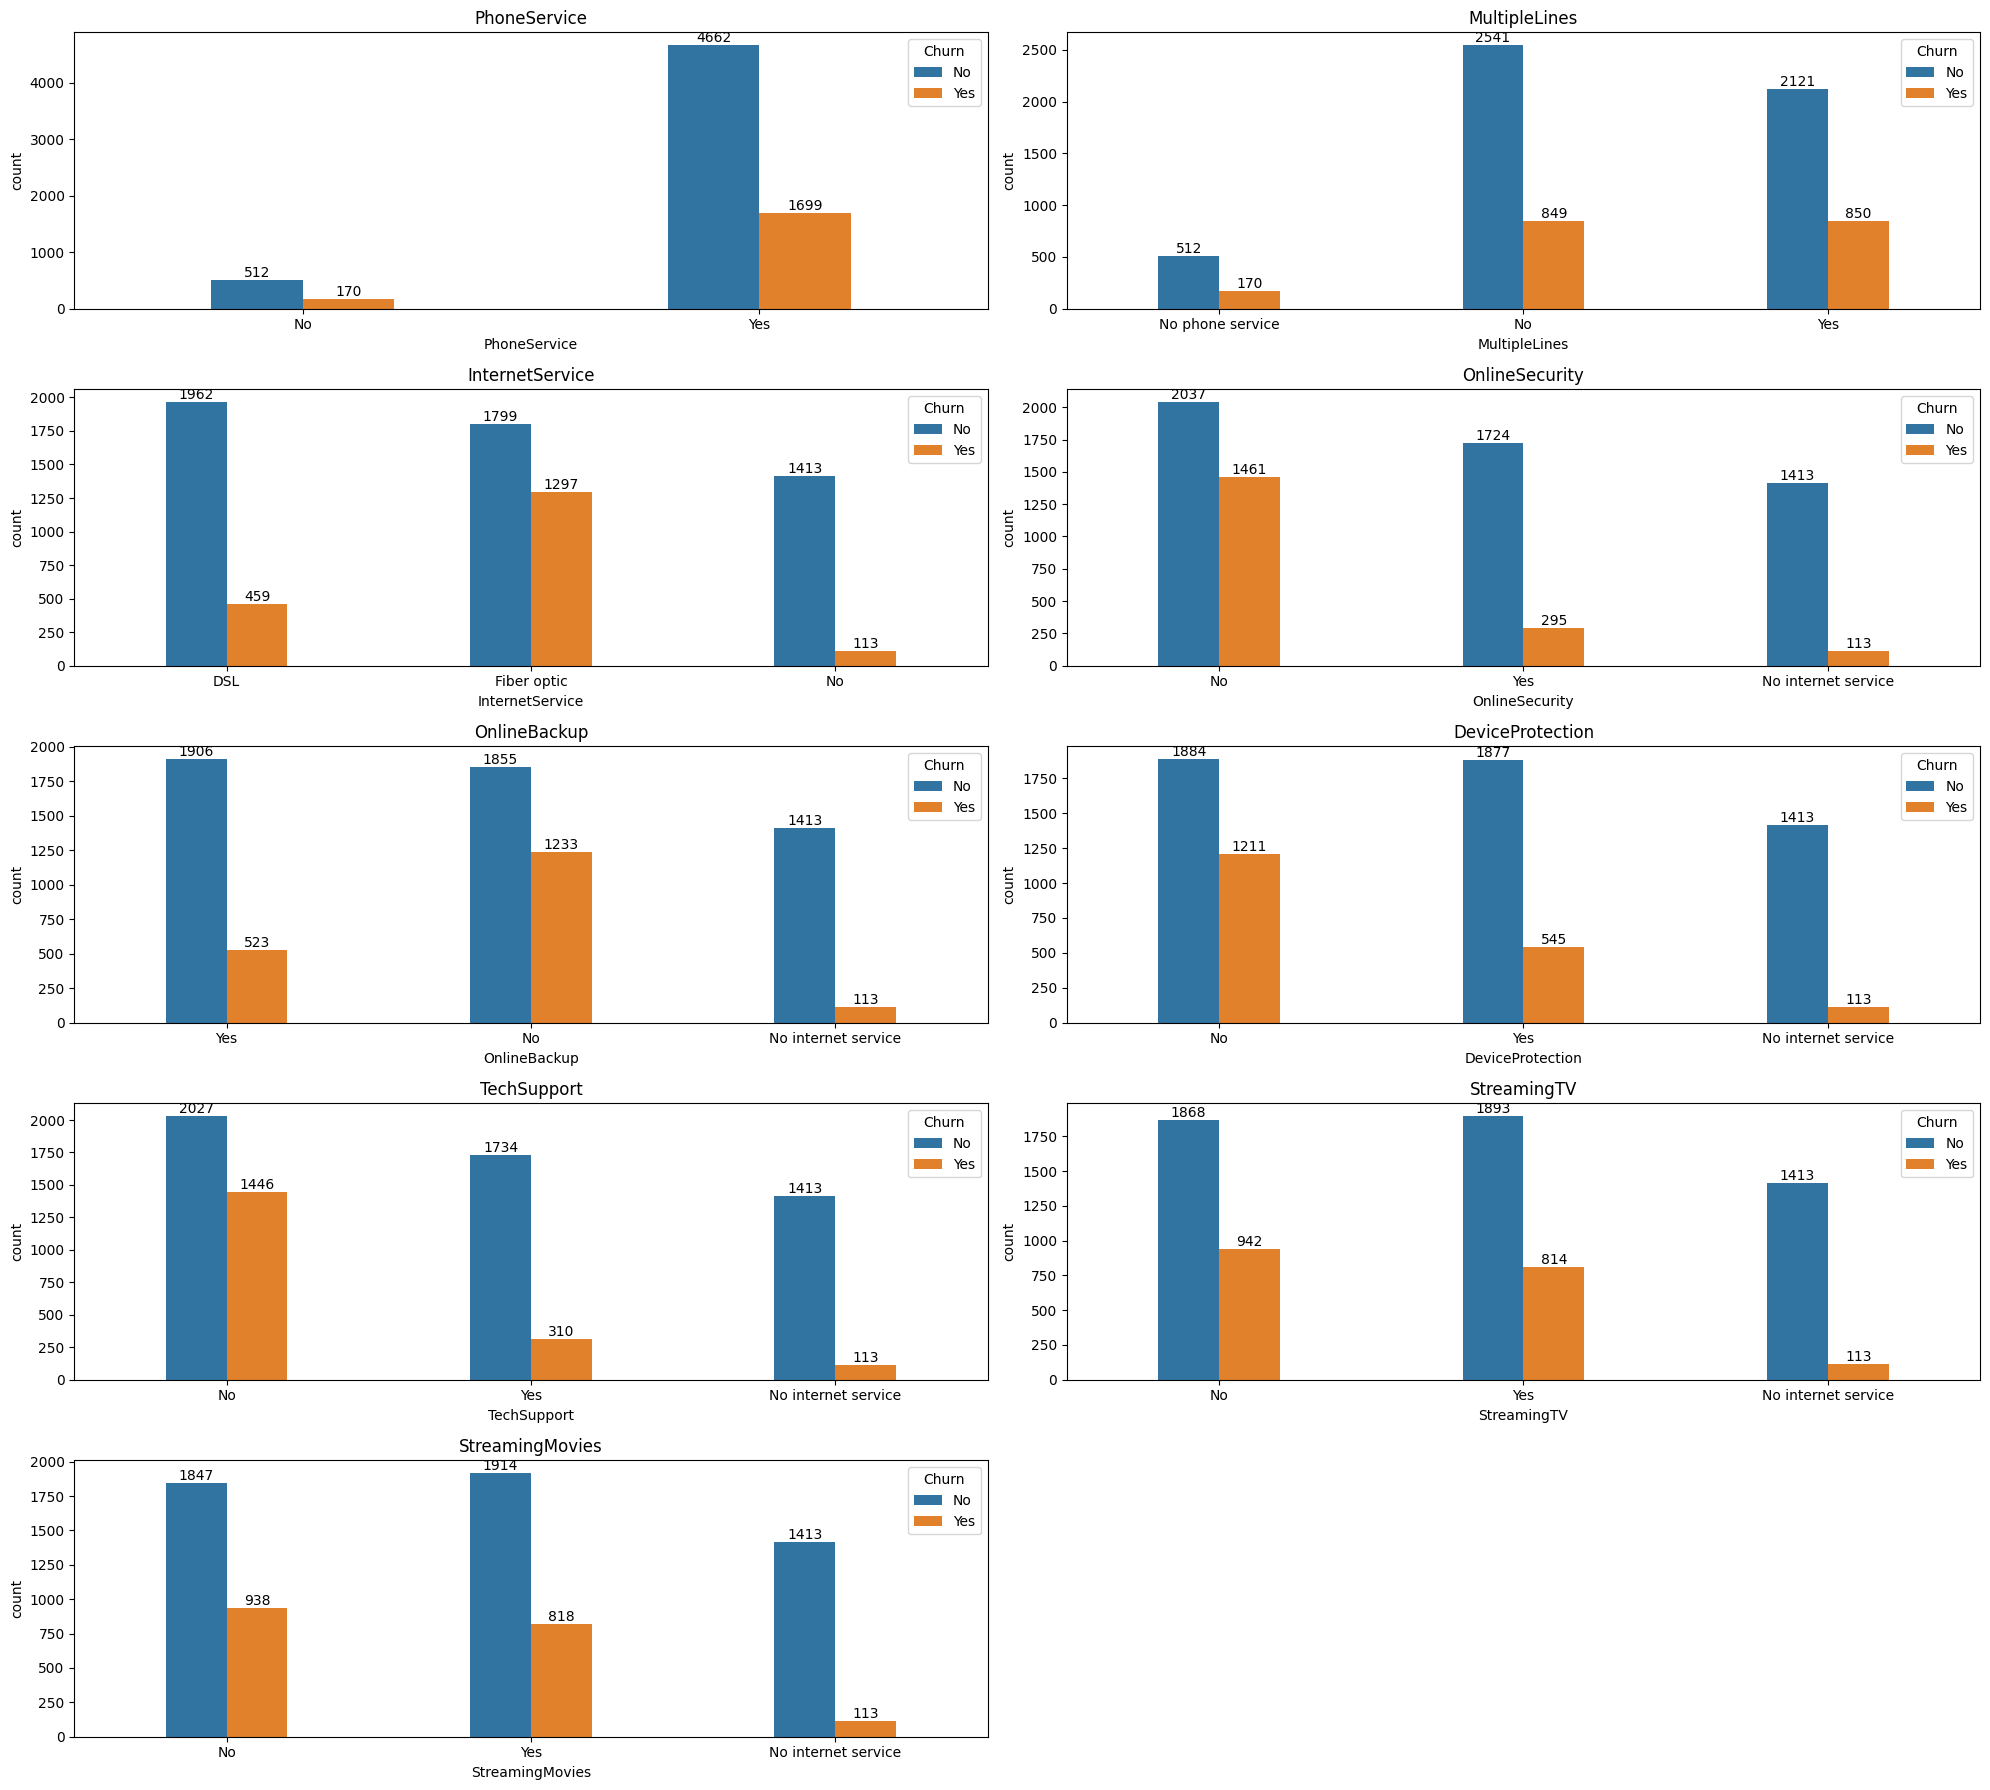

In [21]:
columns = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

plt.figure(figsize = (20, 18))

for i, column in enumerate(columns, start = 1):
    plt.subplot(5, 2, i)  # 3 rows × 3 columns grid
    ax = sns.countplot(x = column, data = df, hue = df["Churn"], width = 0.4)
    plt.title(column)
    
    # Add count labels using bar_label
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

#### Summary of churn patterns by services
1. PhoneServices and MultipleLines
    - Most customers have a phone service
    - Churn is significantly lower among customers using phone services
    - Customers with multiple lines show higher churn rate than those with no phone services or a single line
2. InternetService
    - Fiber optic users show the highest churn rate then comes DSL
    - Customers with no internet services have the lowest churn, likely because they use minimal services or are elderly
3. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport
    - Churn is higher among customers who don’t have these services
    - Customers with security, backup, or tech support are more loyal, less churn rate
4. StreamingTV & StreamingMovies
    - Churn appears slightly higher among customers who do not use streaming services
    - However, the difference is not as significant as in technical support or security-related services

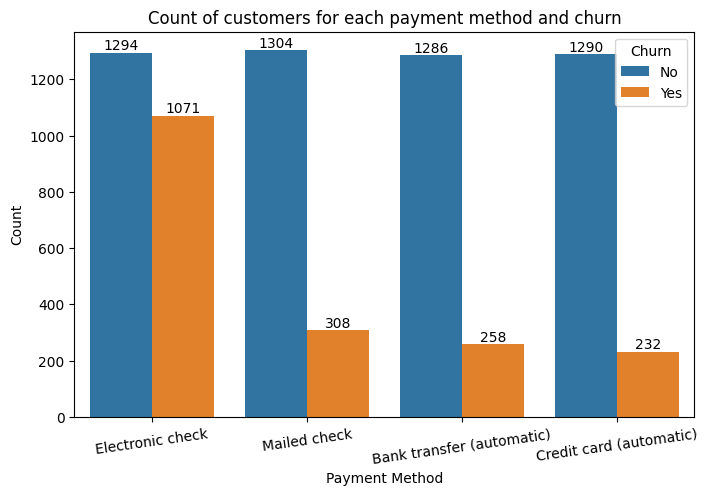

In [29]:
plt.figure(figsize = (8, 5))
payment_plot = sns.countplot(x = df["PaymentMethod"], data = df, hue = df["Churn"])
payment_plot.bar_label(payment_plot.containers[0])
payment_plot.bar_label(payment_plot.containers[1])
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Count of customers for each payment method and churn")
plt.xticks(rotation = 8)
plt.show()

Customer is more likely to churn if they are using electronic check as their payment method